In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import io
%cd "D:\Airline Psaaenger Satisfaction Capstone Project 2"

D:\Airline Psaaenger Satisfaction Capstone Project 2


### Loading Datasets

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
train.shape

(103904, 25)

In [7]:
test.shape

(25976, 25)

In [8]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [9]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [10]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int64

### Checking whether the data set is imbalanced or not

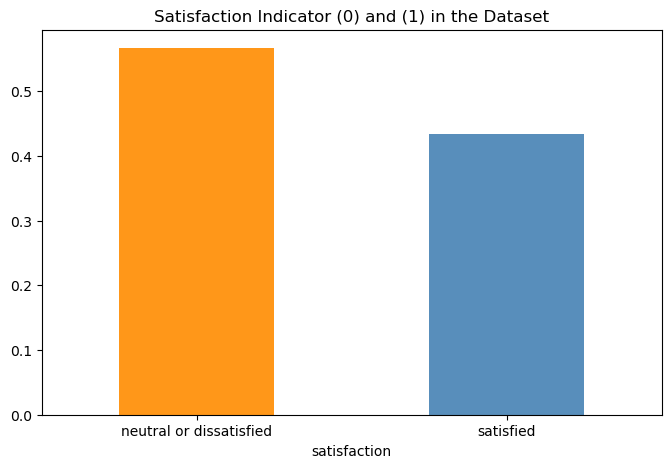

In [11]:
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

In [12]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival Delay in Minutes,310,0.002984
Unnamed: 0,0,0.000000
Online boarding,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000


In [13]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival Delay in Minutes,83,0.002984
Unnamed: 0,0,0.000000
Online boarding,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000


### Imputing the missing values

In [14]:
# Imputing missing value with mean - Train and Test
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].mean())
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].mean())

In [15]:
test.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [16]:
train.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [17]:
train.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [18]:
test.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### EDA

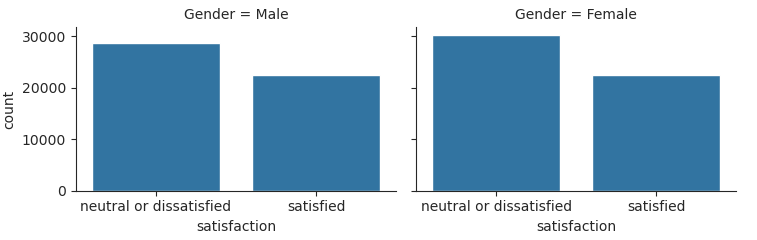

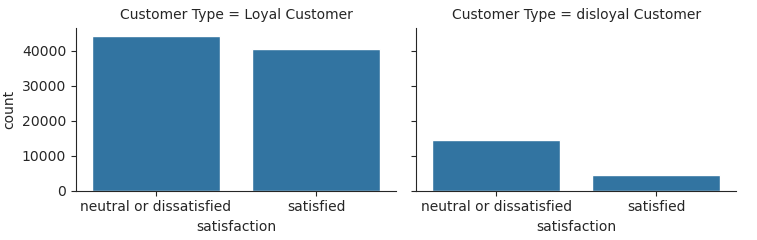

In [19]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)
    g = sns.catplot(x="satisfaction", col="Customer Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)

Gender:
It is observed that gender distribution of neutral/dissatisfied and satisfied customers are similar. For both male and female passengers, number of neutral/dissatisfied customers are on the higher when compared to number of satisfied customers.

Customer Type:
Even among loyal passengers which are high in number, the ratio of satisfied and neutral/dissatisfied ones are almost close to 49:51.

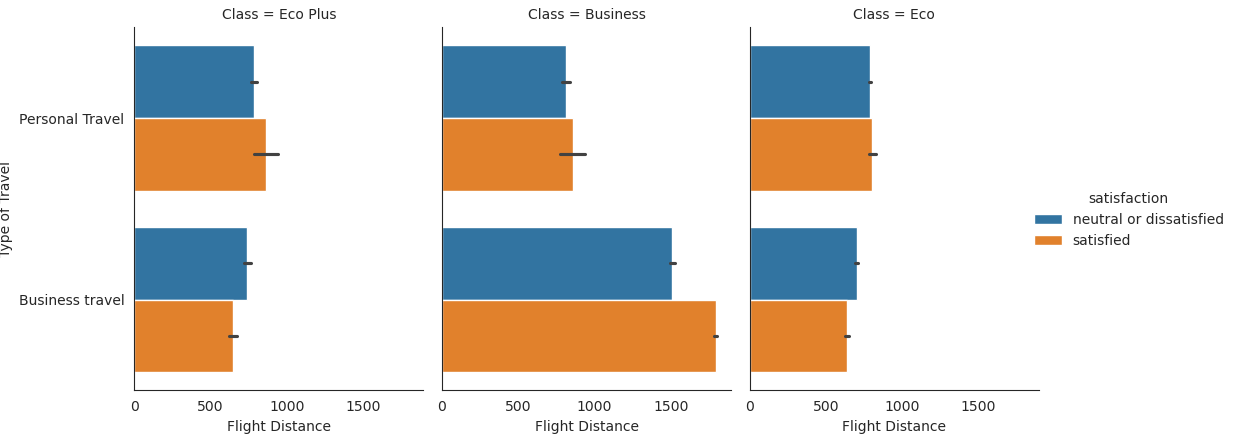

In [20]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

Type of Travel and Flight Distance grouped by Class:
For business travel in business class category, the number of satisfied passengers are quite on the higher for longer flight distance. For other combinations, almost equal distribution of satisfied and neutral/dissatisfied passengers is present

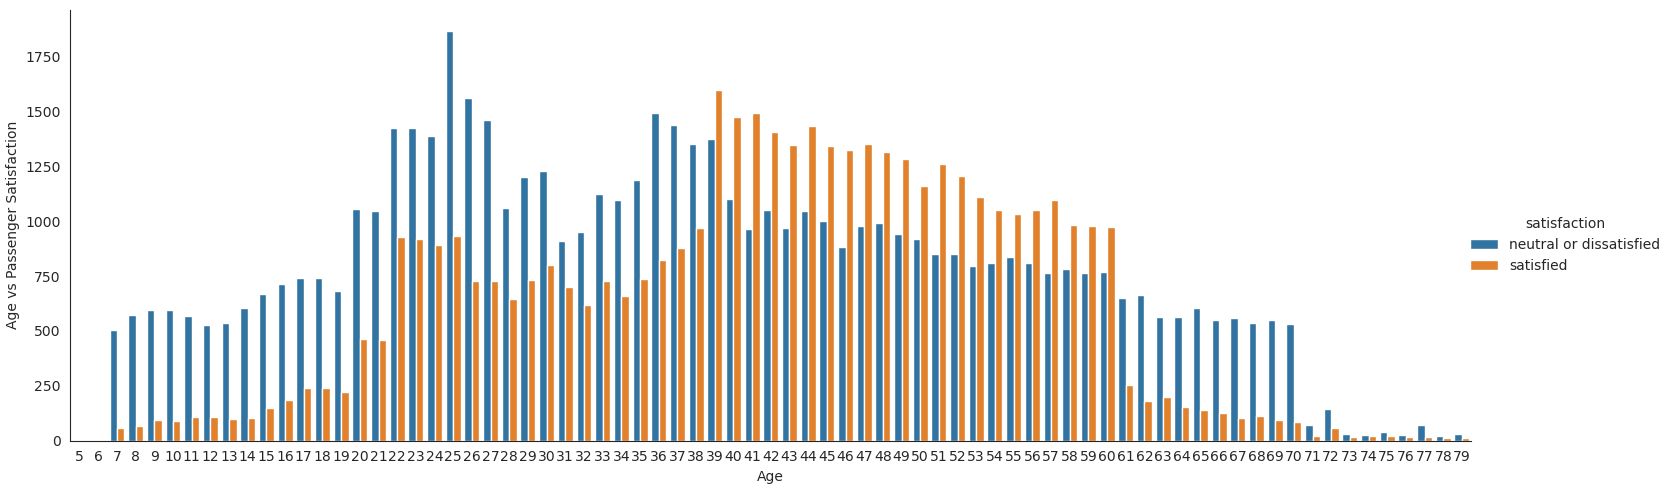

In [21]:
# Age
with sns.axes_style('white'):
    g = sns.catplot(x="Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')


Age:
From age 7-to-38 and from age 61-to-79, the number of neutral/dissatisfied passengers is very high compared to satisfied passengers. On the other hand, in age group 39-60, the number of satisfied passengers is higher compared to neutral/dissatisfied passengers.

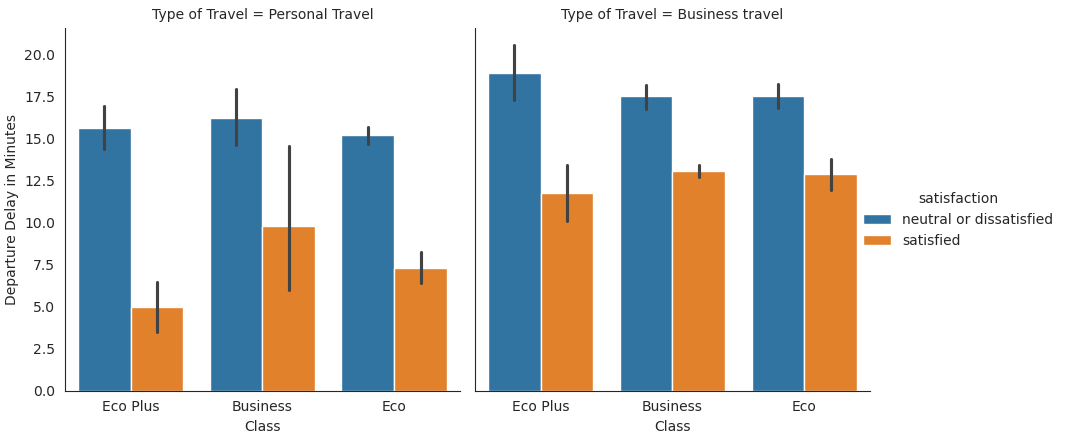

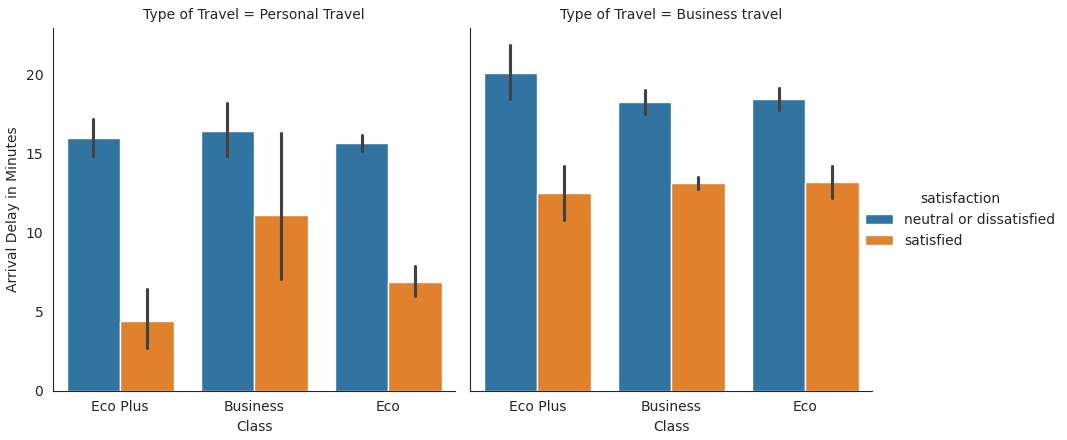

In [22]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar", height=4.5, aspect=1.0)

Departure Delay, Arrival Delay grouped by Type of Travel:
For personal type of travel (specially for classes Eco Plus and Eco), the number of neutral/dissatisfied passengers are really high when arrival delay is high which is quite obvious. By minute comparison, all combinations have higher number of neutral/dissatisfied passengers compared to the number of satisfied passengers

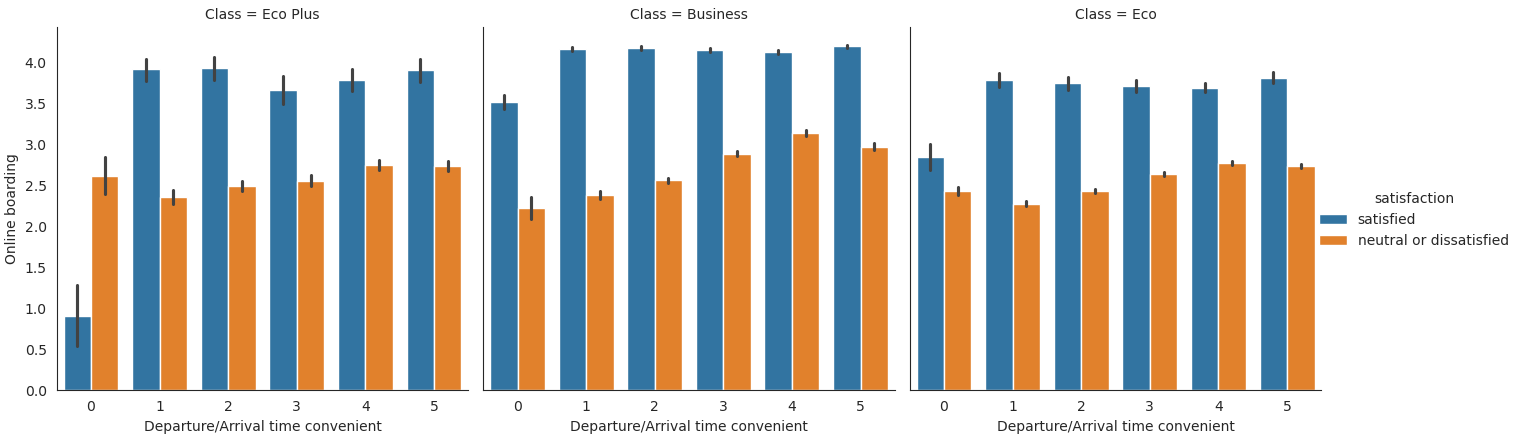

In [23]:
# Online_boarding and Departure/Arrival_time_convenient by class
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival time convenient", y="Online boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0)

Online Boarding, Departure/Arrival Time Convenience grouped by Class:
For Eco Plus class, very inconvenient Departure/Arrival time i.e., Departure/Arrival_time_convenient = 0 has high number of neutral/dissatisfied passengers, even when online boarding is on positive side. For other combinations, the number of satisfied passengers are higher compared to number of neutral/dissatisfied passengers.

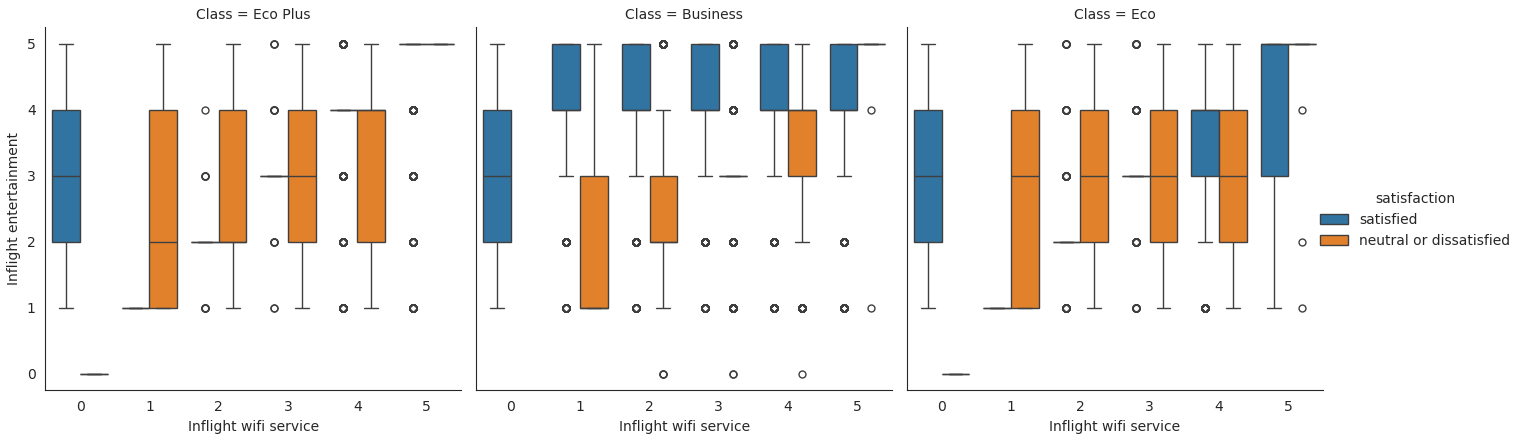

In [24]:
# Inflight_wifi_service and Inflight_entertainment by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

Inflight Entertainment, Inflight wi-fi Service grouped by Class:
Eco Plus passengers are mostly satisfied without inflight wi-fi service (rating 0) and with moderate level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can bring satisfaction in them. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

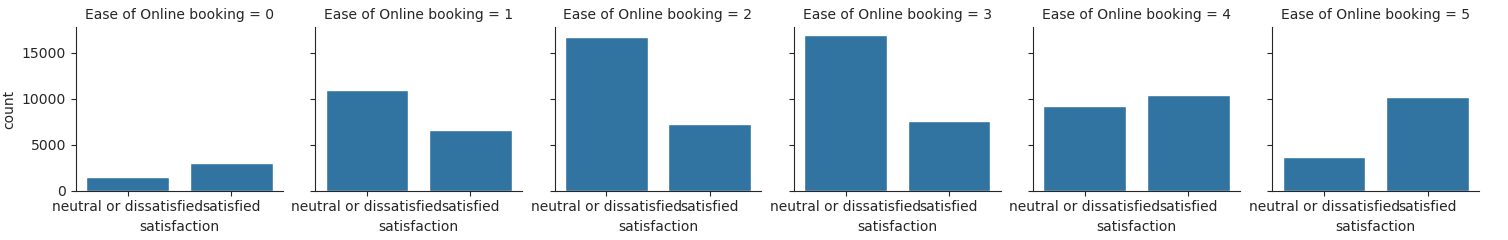

In [25]:
# Ease_of_Online_booking
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Ease of Online booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

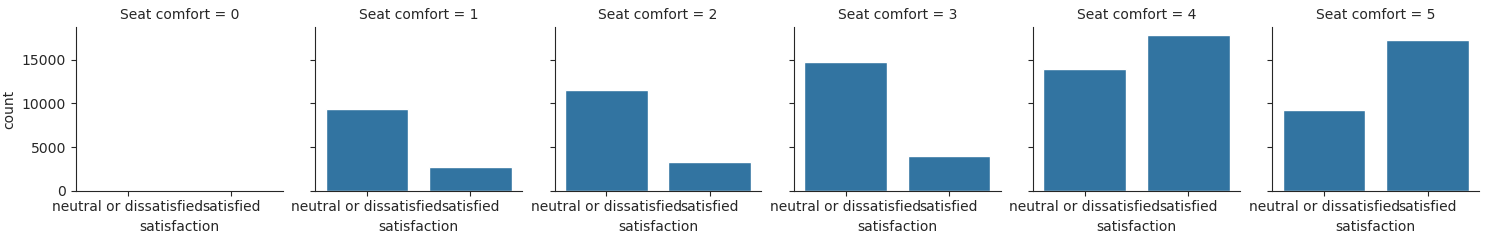

In [26]:
# Seat_comfort
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Seat comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)


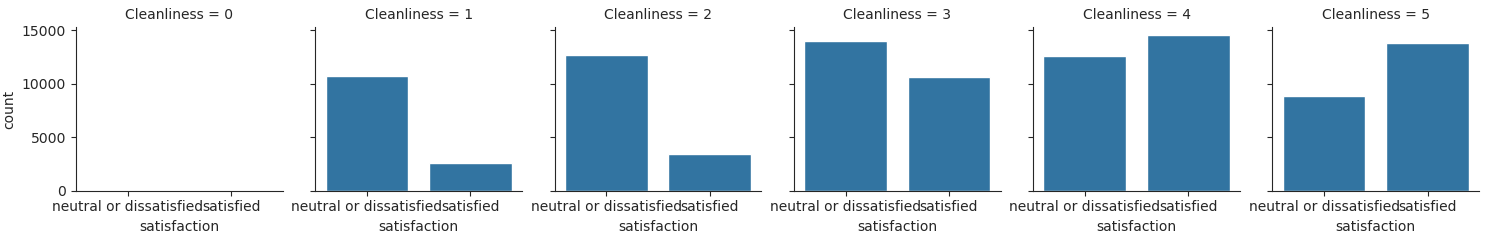

In [27]:
# Cleanliness
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

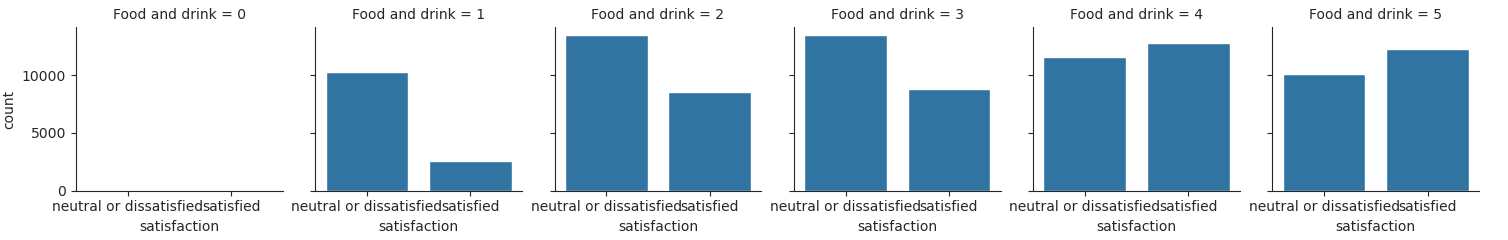

In [28]:
# Food_and_drink
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Food and drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

Ease of Online Booking, Seat Comfort, Cleanliness & Food and Drink:
For all of these four features, maximum number of satisfied passengers belongs to the category who gave 4 and 5 rating. The passengers who gave rating below 4 are mostly neutral/dissatisfied.

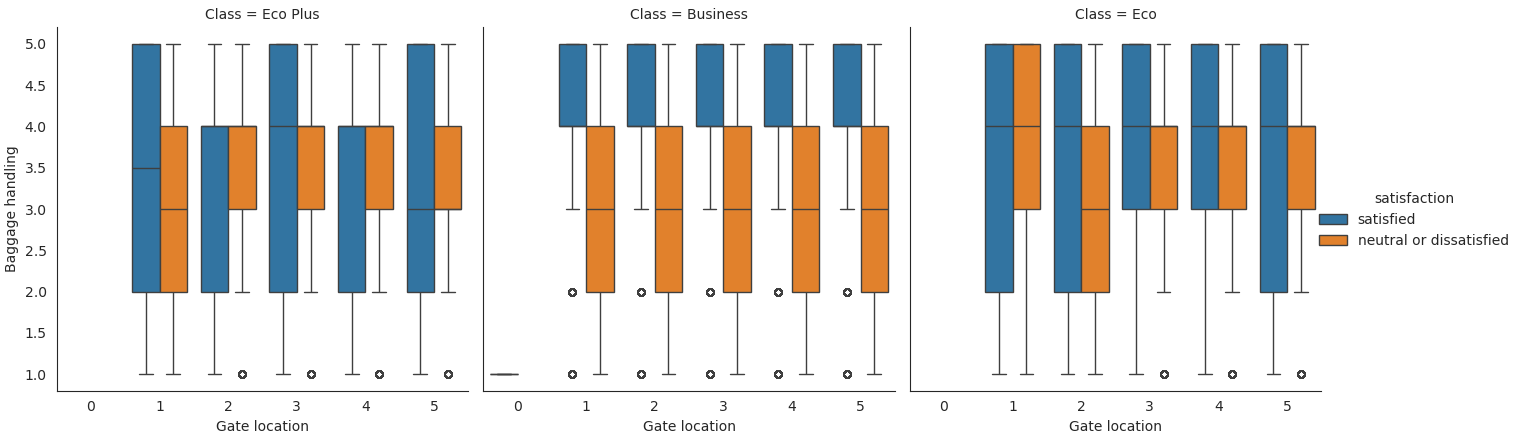

In [29]:
# Gate_location and Baggage_handling by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Gate location", y="Baggage handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

Gate Location and Baggage Handling grouped by Class:
For business class passengers, it is observed that all gate locations have higher number of neutral/dissatisfied passengers when baggage handling is not upto the satisfactory level (rating <= 4). For Eco Plus class, when the gate location is 1 and for Eco class, when the gate location is 2, even when the baggages are handled in a mediocre way (rating 2 to 4), passengers remained neutral/dissatisfied

<Axes: xlabel='Inflight service', ylabel='satisfaction'>

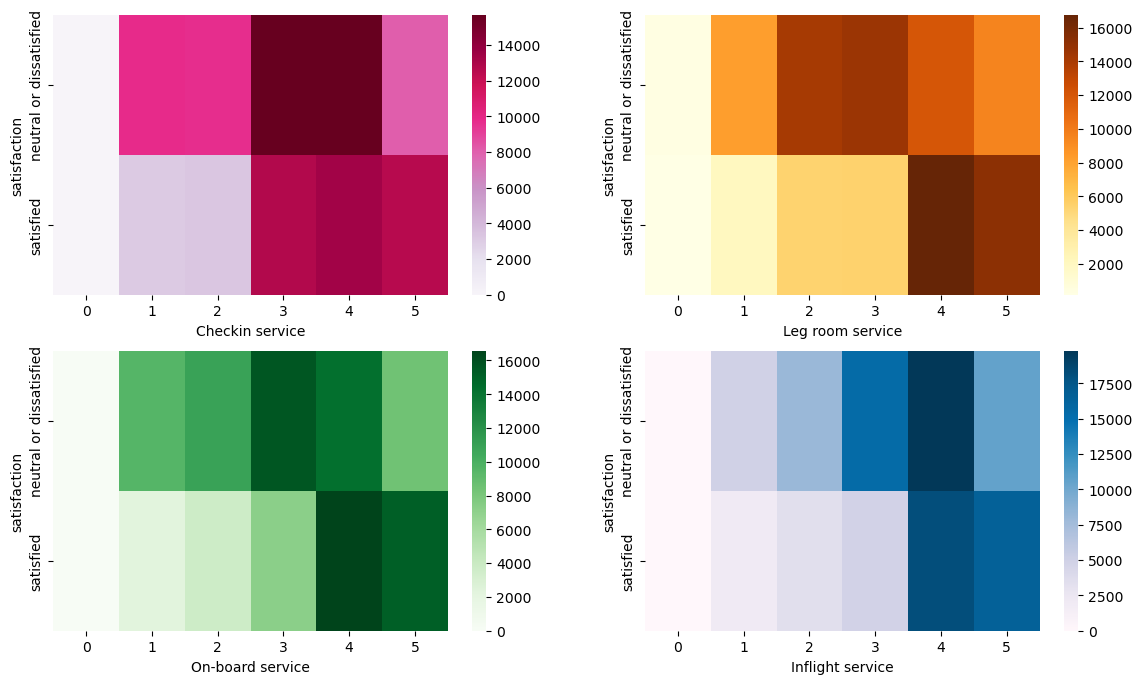

In [30]:
# Checkin_service, Leg_room_service, On-board_service and Inflight_service

fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Leg room service'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Inflight service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

Checkin Service, Leg-room Service, On-board Service and Inflight Service:
For checkin services, the passengers who gave 0-2 rating are majorly neutral/dissatisfied. For other three services mentioned above, only the customers or passengers who give 4 and 5 rating belong to satisfied passengers category.

### Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# For Train set
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [33]:
# For Test Set
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

In [34]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,0,0,52,0,1,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,0,0,36,0,0,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,1,1,20,0,1,192,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,1,0,44,0,0,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,0,0,49,0,1,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,1


In [35]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Dropping Unnamed and id columns

In [36]:
# Drop unnecessary columns
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)

In [37]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [38]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)

In [39]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Detection and Removal of Outliers

In [40]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)   

Gender                                  1.0
Customer Type                           0.0
Age                                    24.0
Type of Travel                          1.0
Class                                   1.0
Flight Distance                      1329.0
Inflight wifi service                   2.0
Departure/Arrival time convenient       2.0
Ease of Online booking                  2.0
Gate location                           2.0
Food and drink                          2.0
Online boarding                         2.0
Seat comfort                            3.0
Inflight entertainment                  2.0
On-board service                        2.0
Leg room service                        2.0
Baggage handling                        2.0
Checkin service                         1.0
Inflight service                        2.0
Cleanliness                             2.0
Departure Delay in Minutes             12.0
Arrival Delay in Minutes               13.0
satisfaction                    

In [41]:
# Removal of outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

<Axes: >

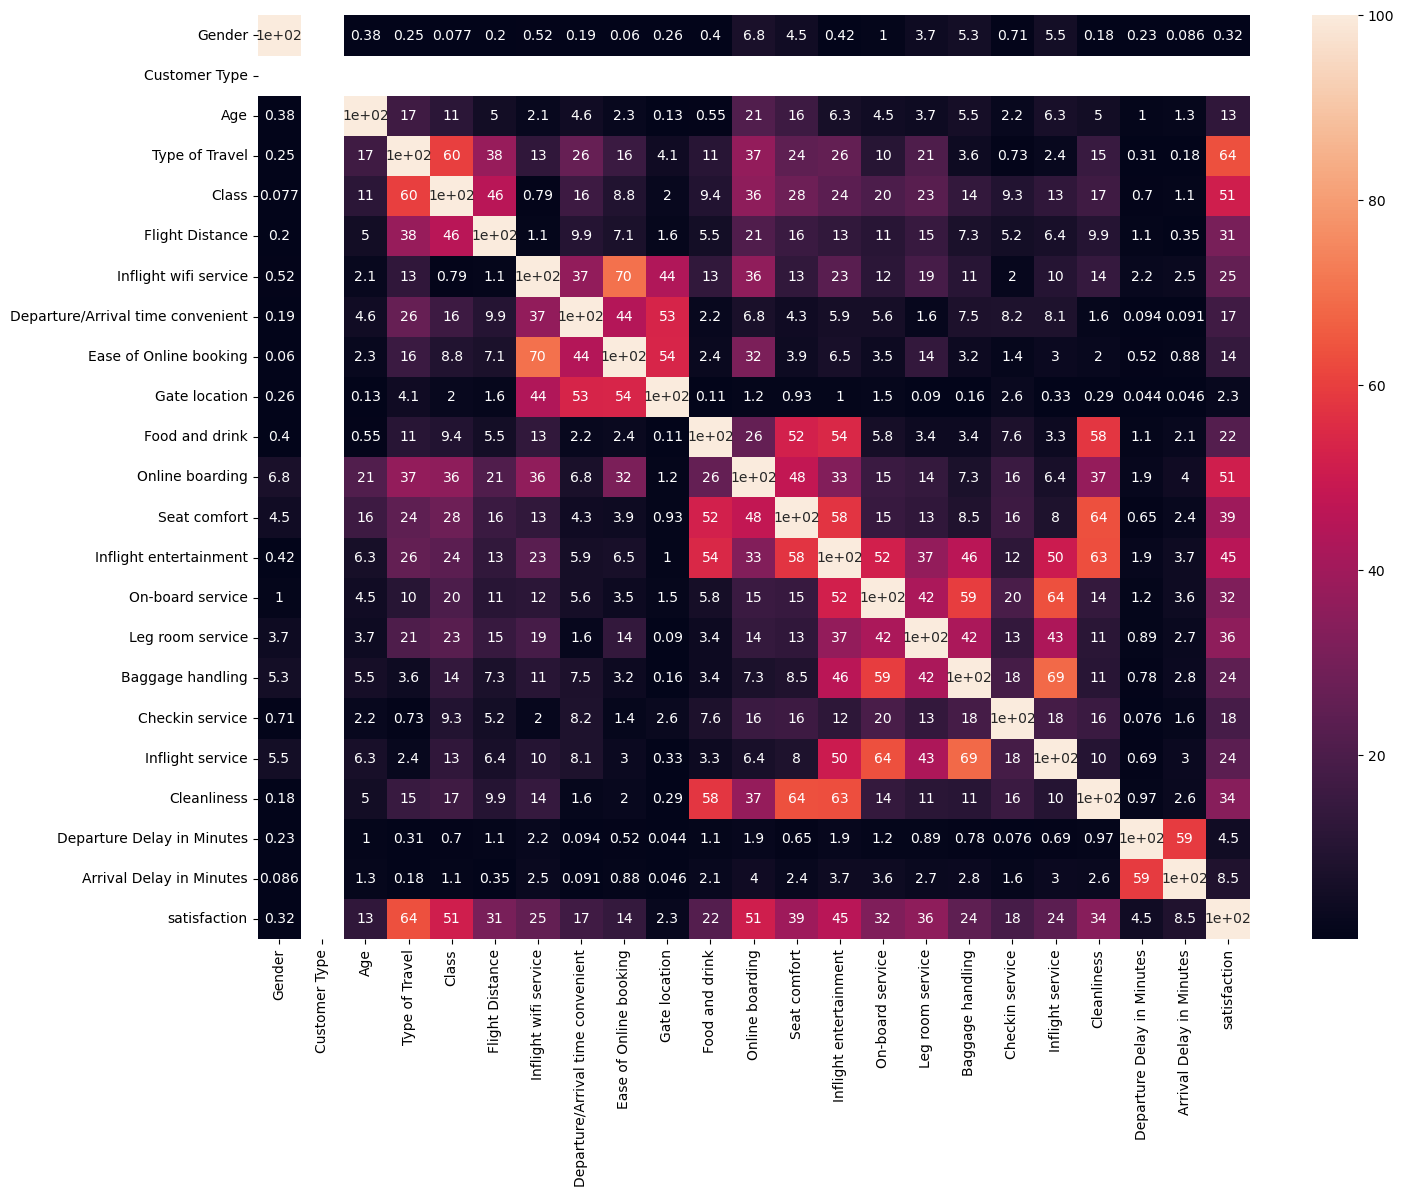

In [42]:
fig, ax = plt.subplots(figsize = (16,12))
sns.heatmap(abs(train.corr()) * 100, annot = True)

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service" and "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corrrelation coefficient exactly equal to 1. Therefore there is no perfect multi-collinearity. Hence we are not discarding any variable

In [43]:
xtrain=train.drop(["satisfaction"],axis=1)
ytrain=train["satisfaction"]

In [44]:
xtrain.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
5,0,0,26,1,1,1180,3,4,2,1,...,1,1,3,4,4,4,4,1,0,0.0
6,1,0,47,1,1,1276,2,4,2,3,...,2,2,3,3,4,3,5,2,9,23.0


In [45]:
ytest = test["satisfaction"]
xtest= test.drop({"satisfaction"},axis=1)

In [46]:
xtest.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,52,0,1,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,0,0,36,0,0,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,1,1,20,0,1,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,1,0,44,0,0,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0


In [47]:
ytrain.head()

0    0
2    1
4    1
5    0
6    0
Name: satisfaction, dtype: int32

In [48]:
ytrain.info()

<class 'pandas.core.series.Series'>
Index: 61197 entries, 0 to 103903
Series name: satisfaction
Non-Null Count  Dtype
--------------  -----
61197 non-null  int32
dtypes: int32(1)
memory usage: 717.2 KB


In [49]:
ytest.head()

0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int32

In [51]:
train_df = train.drop(columns = ['Gender', 'Customer Type', 'Age', 'Departure/Arrival time convenient', 'Ease of Online booking',
                                'Gate location', 'Food and drink'])
test_df = test.drop(columns = ['Gender', 'Customer Type', 'Age', 'Departure/Arrival time convenient', 'Ease of Online booking',
                                'Gate location', 'Food and drink'])

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61197 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             61197 non-null  int32  
 1   Customer Type                      61197 non-null  int32  
 2   Age                                61197 non-null  int64  
 3   Type of Travel                     61197 non-null  int32  
 4   Class                              61197 non-null  int32  
 5   Flight Distance                    61197 non-null  int64  
 6   Inflight wifi service              61197 non-null  int64  
 7   Departure/Arrival time convenient  61197 non-null  int64  
 8   Ease of Online booking             61197 non-null  int64  
 9   Gate location                      61197 non-null  int64  
 10  Food and drink                     61197 non-null  int64  
 11  Online boarding                    61197 non-null  int64  

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int32  
 1   Customer Type                      25976 non-null  int32  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int32  
 4   Class                              25976 non-null  int32  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [54]:
ytrain.head()

0    0
2    1
4    1
5    0
6    0
Name: satisfaction, dtype: int32

### Building the models

#### Logistic Regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
LR = LogisticRegression(max_iter=2000)

In [64]:
LR.fit(xtrain,ytrain)

C:\Users\pisup\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [65]:
LR.score(xtrain,ytrain)

0.8889814860205566

In [66]:
y_predict=LR.predict(xtrain)

In [68]:
pd.crosstab(ytrain,y_predict)

col_0,0,1
satisfaction,,
0,26892,3099
1,3695,27511


In [69]:
from sklearn.metrics import classification_report

In [70]:
result=classification_report(ytrain,y_predict)

In [71]:
print(result)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     29991
           1       0.90      0.88      0.89     31206

    accuracy                           0.89     61197
   macro avg       0.89      0.89      0.89     61197
weighted avg       0.89      0.89      0.89     61197



#### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [220]:
rf=RandomForestClassifier(n_estimators=200,max_depth=12,random_state=12345,min_samples_split=2)

In [221]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=12345)

In [222]:
rf.score(xtrain,ytrain)

0.9682827589587725

In [223]:
ypredict=rf.predict(xtrain)

In [224]:
pd.crosstab(ytrain,ypredict)

col_0,0,1
satisfaction,,
0,29365,626
1,1315,29891


In [225]:
result2=classification_report(ytrain,ypredict)

In [226]:
print(result2)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     29991
           1       0.98      0.96      0.97     31206

    accuracy                           0.97     61197
   macro avg       0.97      0.97      0.97     61197
weighted avg       0.97      0.97      0.97     61197



#### GBM, LGBM,XGBM

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [183]:
gbm=GradientBoostingClassifier()
lgbm=lgb.LGBMClassifier()
xgb=xgb.XGBClassifier()

In [184]:
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [185]:
lgbm.fit(xtrain,ytrain)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31206, number of negative: 29991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 61197, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509927 -> initscore=0.039713
[LightGBM] [Info] Start training from score 0.039713


LGBMClassifier()

In [186]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [187]:
gbm.score(xtrain,ytrain)

0.953657859045378

In [188]:
ypredict2=lgb.predict(xtrain)

AttributeError: module 'lightgbm' has no attribute 'predict'

In [189]:
xgb.score(xtrain,ytrain)

0.9850482866807196

In [190]:
ypredict3=xgb.predict(xtrain)

In [191]:
pd.crosstab(ytrain,ypredict3)

col_0,0,1
satisfaction,,
0,29833,158
1,757,30449


In [192]:
result3=classification_report(ytrain,ypredict3)

In [193]:
print(result3)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29991
           1       0.99      0.98      0.99     31206

    accuracy                           0.99     61197
   macro avg       0.99      0.99      0.99     61197
weighted avg       0.99      0.99      0.99     61197



#### Naive Bayes

In [194]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [195]:
Gnb=GaussianNB()

In [196]:
Gnb.fit(xtrain,ytrain)

GaussianNB()

In [197]:
Gnb.score(xtrain,ytrain)

0.8857787146428746

In [199]:
ypredict4=Gnb.predict(xtrain)

In [200]:
pd.crosstab(ytrain,ypredict4)

col_0,0,1
satisfaction,,
0,27521,2470
1,4520,26686


In [201]:
result4=classification_report(ytrain,ypredict4)

In [202]:
print(result4)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     29991
           1       0.92      0.86      0.88     31206

    accuracy                           0.89     61197
   macro avg       0.89      0.89      0.89     61197
weighted avg       0.89      0.89      0.89     61197



## Conclusion

The Airline Passenger Satisfaction dataset was analyzed using various machine learning models, and the results are summarized below. The table shows the performance of each model.


| Model |Accuracy of  the model|
|:------|:-------------:|
|Logistic Regression|0.89|
|Random Forest|0.97|
|Gradient boosting machines|0.95|
|XGBoost|0.98|
|Gaussian Naive Bayes|0.89|

The Best fit model is XGBoost where the accuracy of the model is the highest of all the models performed.